In [3]:
from PULS.evaluation import evaluate_shifted_pi_estimation

dataset_name = 'Gauss'
mean = 0.5
n = 1000
label_frequency = 0.5
pi_grid = [0.2, 0.4, 0.6, 0.8]

df = evaluate_shifted_pi_estimation(dataset_name, mean, n, label_frequency, pi_grid, pi_grid, convert_to_df=True)
df['value'] = round(df['mae'], 3).astype(str) + ' +- ' + round(df['std_mae'], 3).astype(str)
mae_results = df[["pi", "new_pi", "method", "value"]]
mae_results = mae_results.pivot(index=["pi", "new_pi"], columns="method", values="value")
mae_results = mae_results.rename(columns={"DRE": "DRPU"})
mae_results

method                DRPU             KM1             KM2
pi  new_pi                                                
0.2 0.2     0.056 +- 0.028  0.252 +- 0.024  0.179 +- 0.022
    0.4     0.024 +- 0.021   0.239 +- 0.03  0.108 +- 0.023
    0.6      0.065 +- 0.04  0.226 +- 0.028  0.029 +- 0.016
    0.8      0.115 +- 0.05  0.564 +- 0.236  0.632 +- 0.134
0.4 0.2     0.077 +- 0.035  0.225 +- 0.019  0.185 +- 0.022
    0.4     0.033 +- 0.025  0.194 +- 0.022  0.119 +- 0.015
    0.6     0.048 +- 0.034  0.185 +- 0.025  0.028 +- 0.025
    0.8     0.092 +- 0.049  0.229 +- 0.199  0.545 +- 0.089
0.6 0.2      0.15 +- 0.059   0.21 +- 0.024  0.188 +- 0.021
    0.4     0.087 +- 0.044  0.176 +- 0.024  0.126 +- 0.021
    0.6     0.031 +- 0.034   0.16 +- 0.031  0.045 +- 0.024
    0.8     0.073 +- 0.046  0.221 +- 0.208  0.433 +- 0.232
0.8 0.2     0.296 +- 0.127    0.2 +- 0.021   0.18 +- 0.018
    0.4     0.204 +- 0.109  0.162 +- 0.021  0.122 +- 0.019
    0.6     0.103 +- 0.068  0.146 +- 0.027  0.046 +- 0.026
    0.8     0.052 +- 0.038  0.213 +- 0.219   0.35 +- 0.251

In [2]:
from PULS.evaluation import evaluate_shifted_pi_estimation

dataset_name = 'MNIST'
n = 50_000
label_frequency = 0.095
train_pi = [0.5]
test_pi = [0.2, 0.4, 0.6, 0.8]

df = evaluate_shifted_pi_estimation(dataset_name, None, n, label_frequency, train_pi, test_pi, convert_to_df=True, single_exp=True)
df.pivot(index=["pi", "new_pi"], columns="method", values="estimated_test_pi")


method           DRE       KM1       KM2
pi  new_pi                              
0.5 0.2     0.121083  0.206202  0.223065
    0.4     0.248088  0.380895  0.401170
    0.6     0.421921  0.584753  0.570109
    0.8     0.555529  0.788692  0.664702

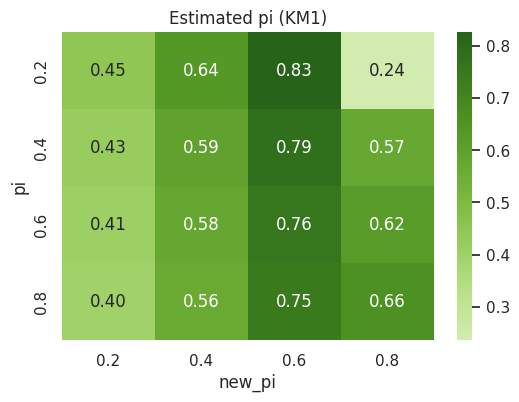

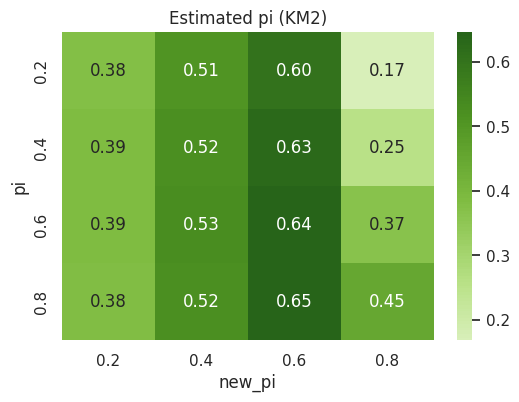

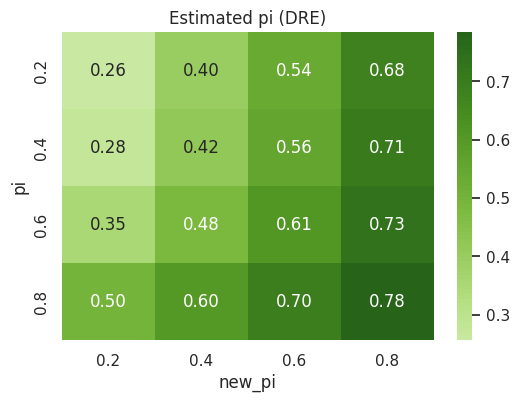

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for method in df["method"].unique():
    df_method = df[df["method"] == method]
    plt.figure(figsize=(6, 4))
    plt.title(f"Estimated pi ({method})")
    sns.heatmap(df_method.pivot(index="pi", columns="new_pi", values="mean"), annot=True, fmt=".2f", 
        cmap= "PiYG",
        vmin= min(df_method["mean"]),
        vmax= max(df_method["mean"]),
        center=0)
    plt.show()